In [ ]:
# https://www.geeksforgeeks.org/ml-k-means-algorithm/
# https://machinelearningmastery.com/clustering-algorithms-with-python/
#One of the biggest problem with kmean is wrongly initilized random centroid. We cannot have any control over it.
#To address this problem kmean++ create farthest distance centroid first. After than it works like normal kmean

In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
  
# creating data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)
  
mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)
  
mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)
  
mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)
  
data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

C:\Users\admin\AppData\Local\Temp/ipykernel_24764/2733399797.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
C:\Users\admin\AppData\Local\Temp/ipykernel_24764/2733399797.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]])


In [52]:
# function to plot the selected centroids
def plot(data, centroids):
    plt.figure(figsize=(20,10))
    plt.scatter(data[:, 0], data[:, 1], marker = '+',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1], marker = 'o',
                color = 'cyan', label = 'previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], marker = 'x',
                color = 'red', label = 'next centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))
     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
          
# function to compute euclidean distance
def distance(p1, p2):
    return np.sum((p1 - p2)**2)
  
# initialization algorithm
def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))
  
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
             
            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        print (centroids)
        plot(data, np.array(centroids))
    return centroids

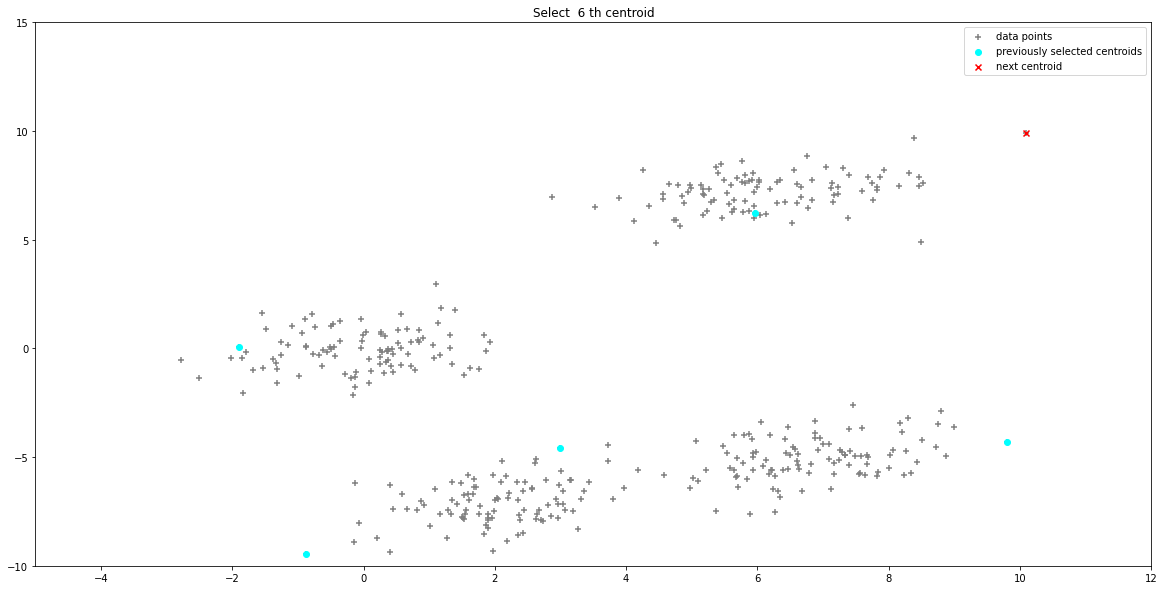

In [53]:
plot(data, np.array(centroids))

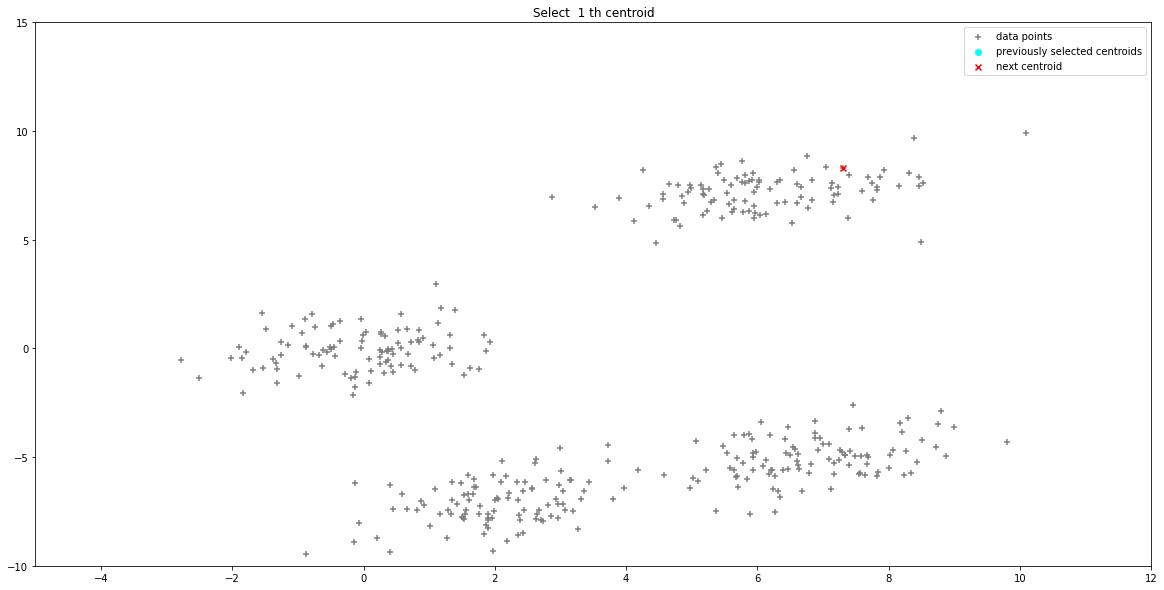

[array([7.30934472, 8.30182625]), array([-0.88152984, -9.4740916 ])]


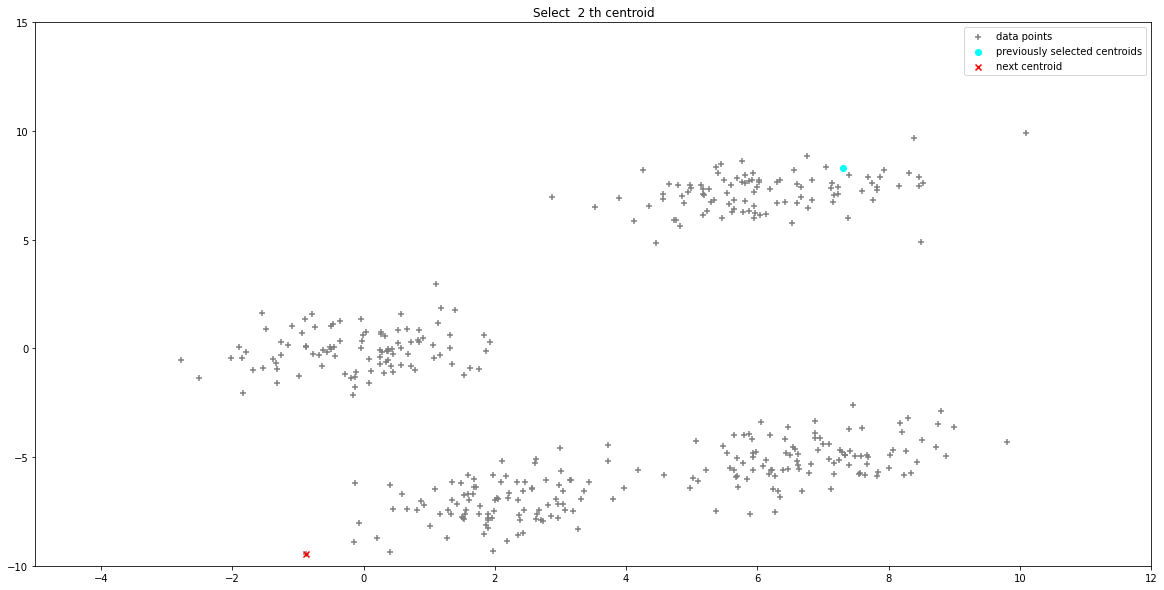

[array([7.30934472, 8.30182625]), array([-0.88152984, -9.4740916 ]), array([ 9.8020665 , -4.28413024])]


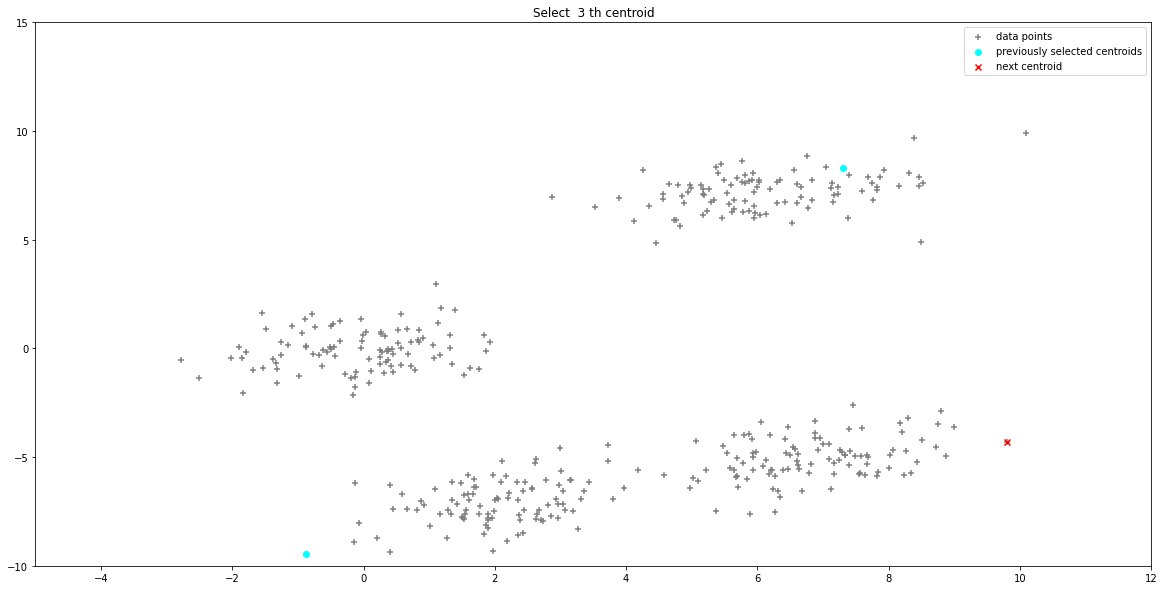

[array([7.30934472, 8.30182625]), array([-0.88152984, -9.4740916 ]), array([ 9.8020665 , -4.28413024]), array([-1.54300235,  1.6288056 ])]


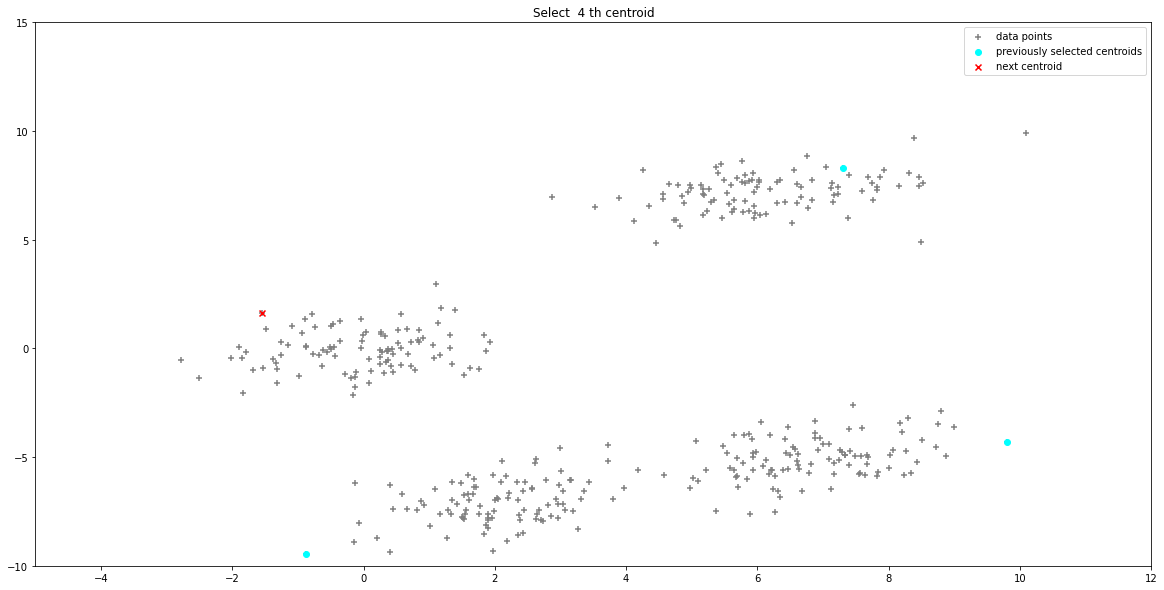

[array([7.30934472, 8.30182625]), array([-0.88152984, -9.4740916 ]), array([ 9.8020665 , -4.28413024]), array([-1.54300235,  1.6288056 ]), array([ 2.99446369, -4.59461606])]


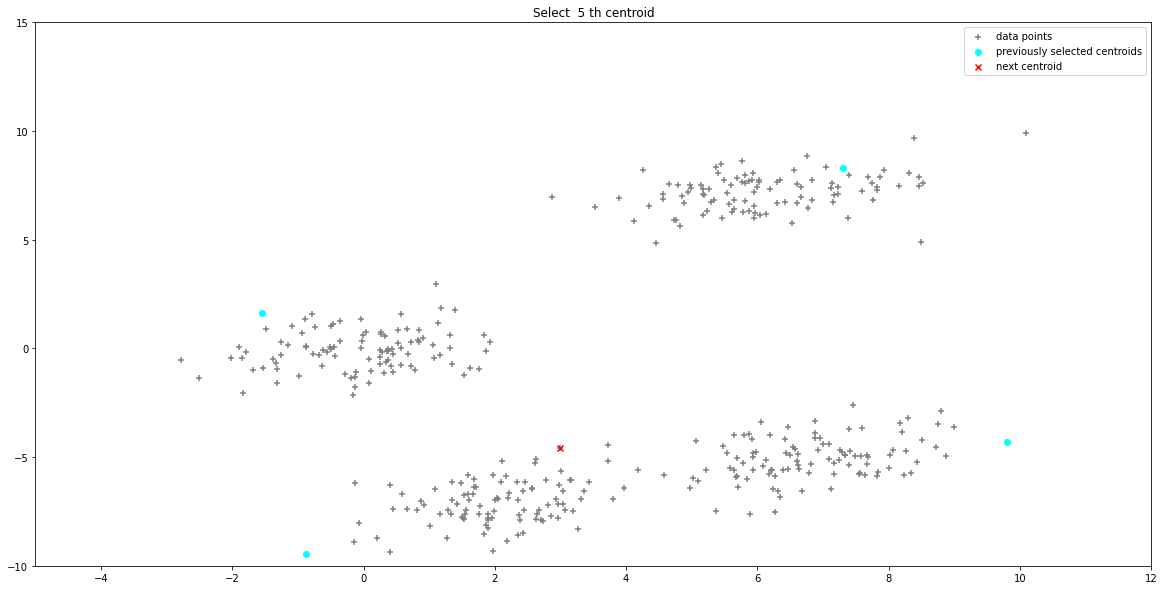

[array([7.30934472, 8.30182625]), array([-0.88152984, -9.4740916 ]), array([ 9.8020665 , -4.28413024]), array([-1.54300235,  1.6288056 ]), array([ 2.99446369, -4.59461606]), array([2.87699838, 6.95970737])]


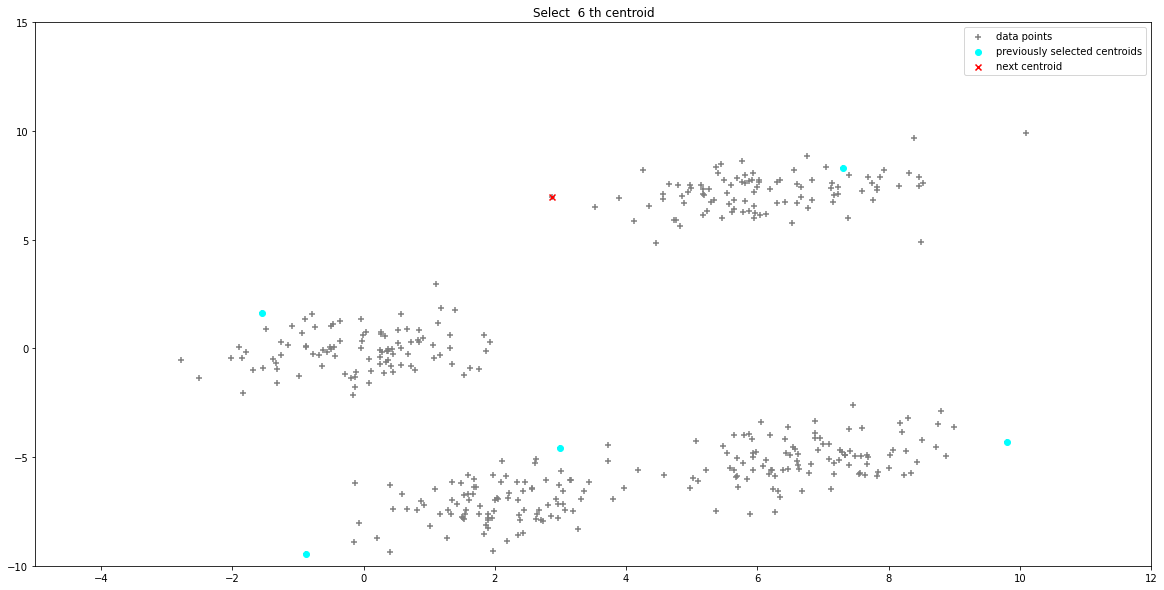

In [54]:
# call the initialize function to get the centroids
centroids = initialize(data, k = 6)

In [38]:
centroids

[array([-1.25431077, -0.28439159]),
 array([10.0936658,  9.9028965]),
 array([ 9.8020665 , -4.28413024]),
 array([ 1.97526123, -9.33045107]),
 array([2.87699838, 6.95970737]),
 array([8.49504528, 4.89848936])]

# K Mean Minibatch

d:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


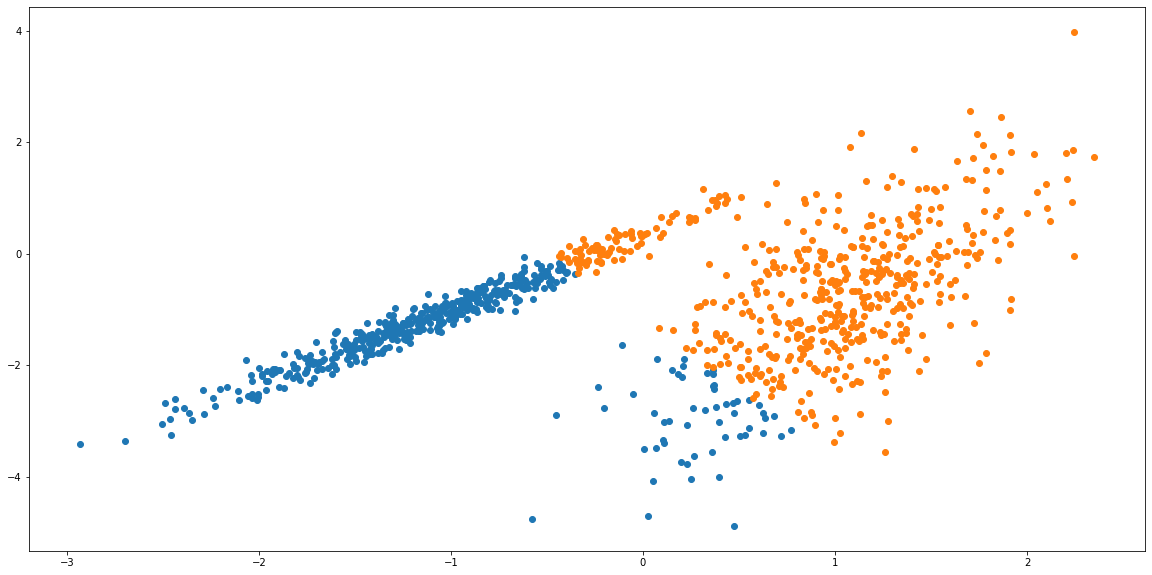

In [69]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(20,10))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples

	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

# Data Generation

In [ ]:
mean_001 = np.array([0.0, 0.0, 0.0])
cov_001 = np.array([[1, 0.3, 0.2], [0.3, 1, 0.3 ], [0.2, 0.3, 1]])
dist_001 = np.random.multivariate_normal(mean_001, cov_001, 10)
dist_001

In [ ]:
dist_001[:2,:1]